/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


X-To-A Ratio


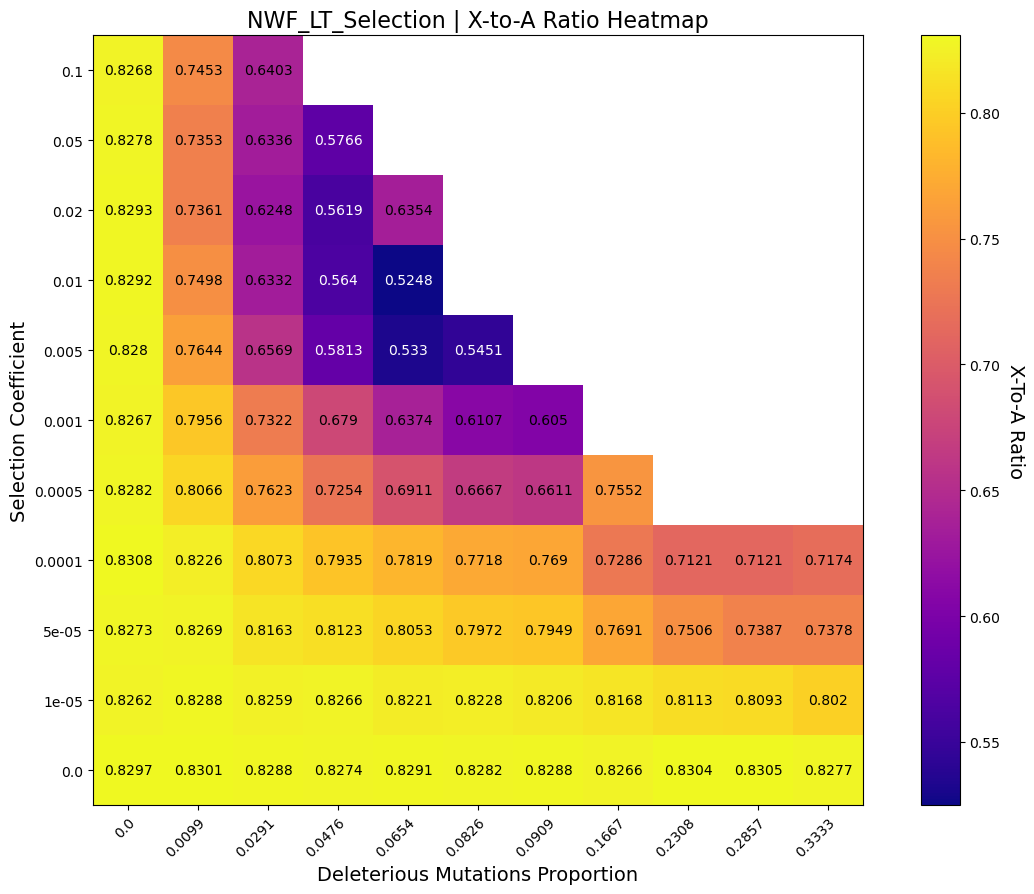


PiX 


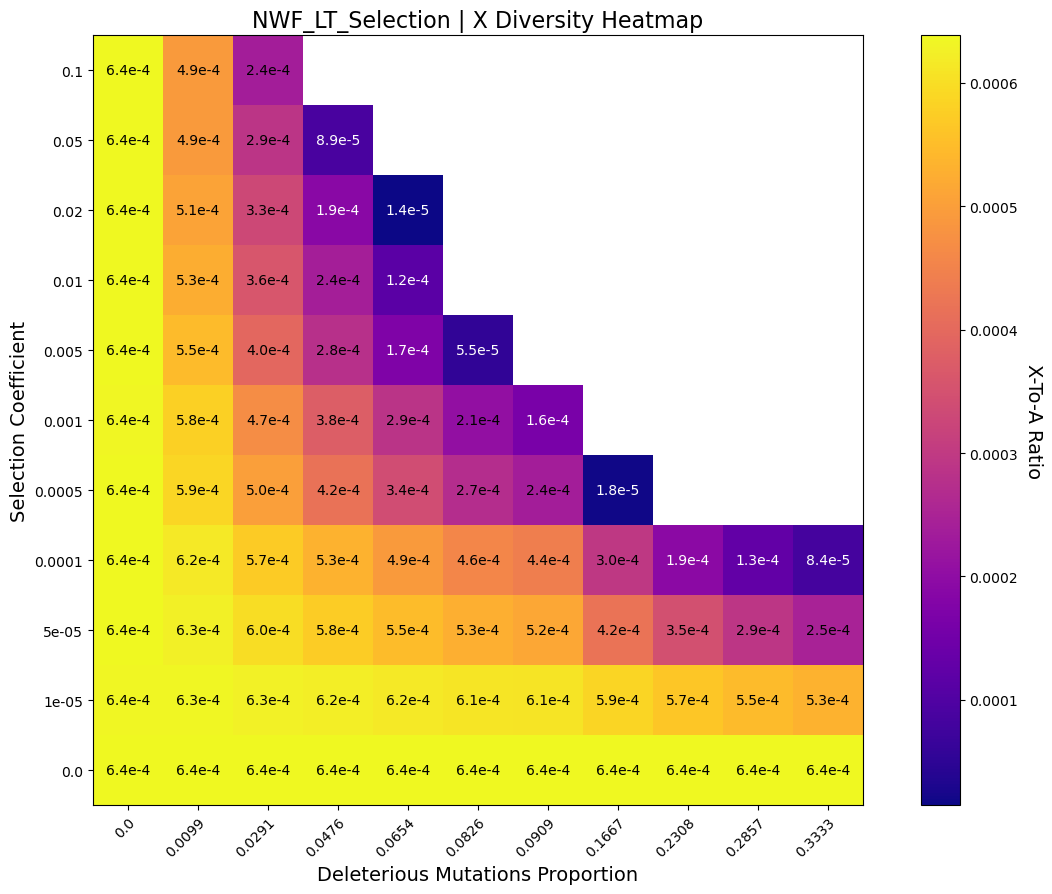


PiA


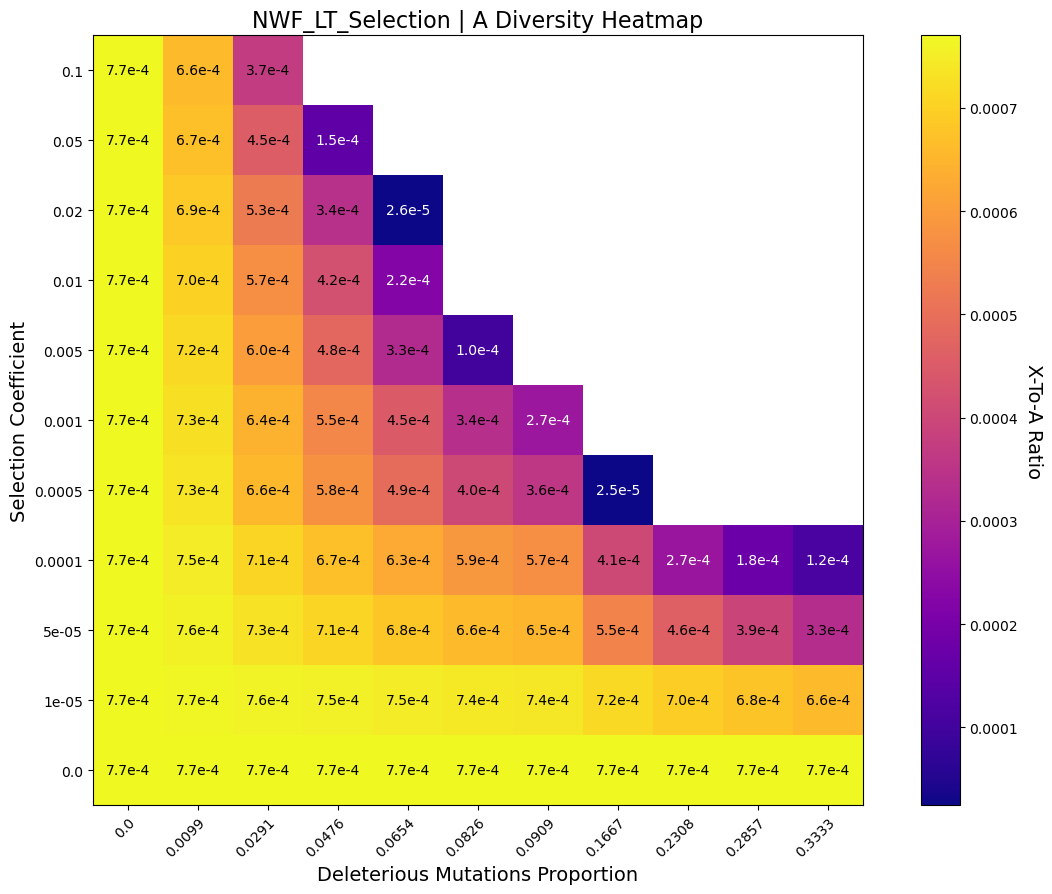

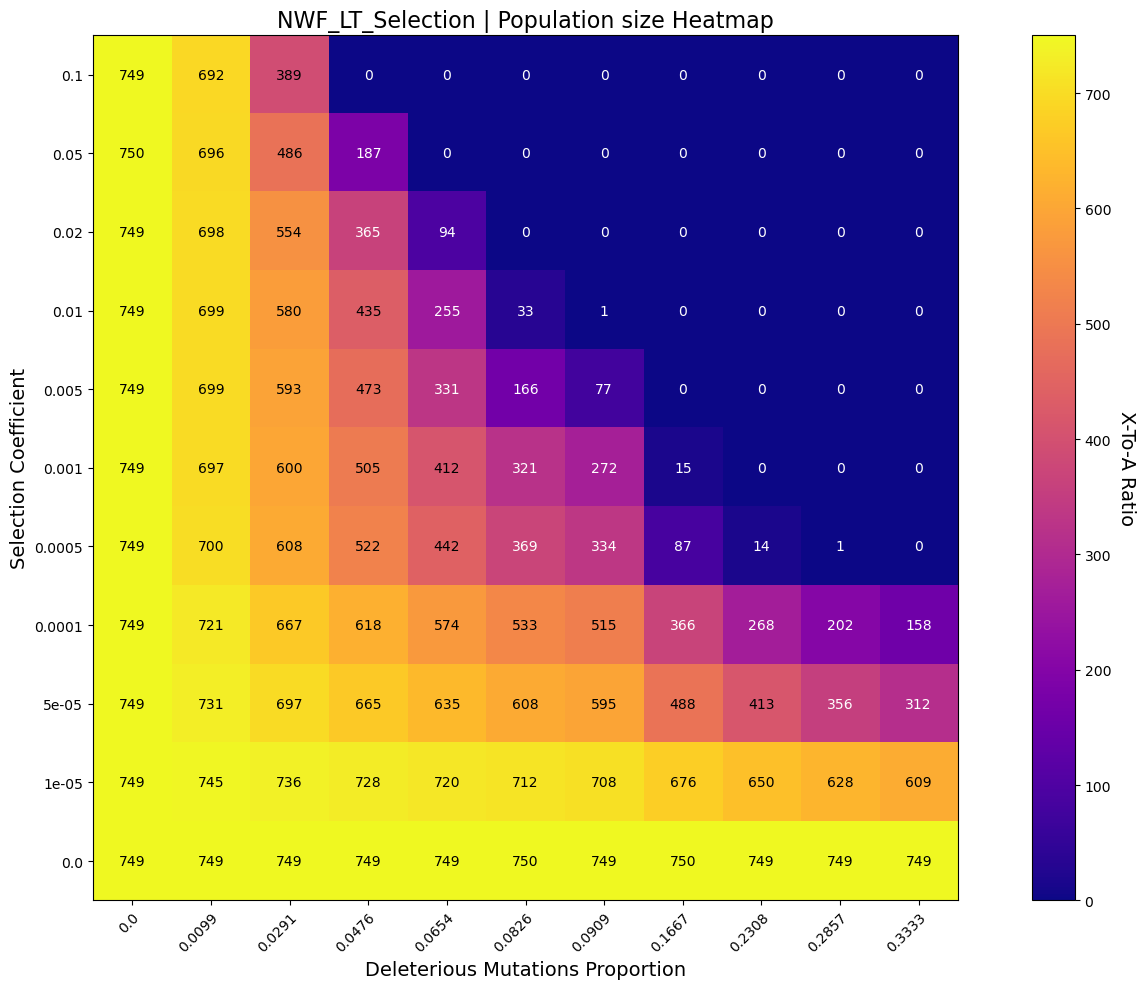

In [9]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

def format_sci(val):
    try:
        s = f"{val:.1e}"  # Format standard
        if "e" not in s:
            return str(val)  # Pas en notation scientifique
        base, exp = s.split("e")
        exp = str(int(exp))  # Supprime les zéros inutiles (ex: '04' → '4')
        return f"{base}e{exp}"
    except:
        return "NaN"  # Ou une autre valeur par défaut

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Selection/NWFLT_MutonX_Gamma/"

FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Selection/"

Selection_coeff = [0.0,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.02,0.05,0.1]
Selection_coeff.sort(reverse=True)
Selection_prop = [0.0,0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5]

HeatMap_ratio = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_PiX = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_PiA = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_Pop = np.zeros((len(Selection_coeff),len(Selection_prop)))

for i in range(len(Selection_coeff)):
    scoeff = Selection_coeff[i]
    for j in range(len(Selection_prop)):
        sprop = Selection_prop[j]
        Pi_ratio = []
        PiX = []
        PiA = []
        Pop = []
        for NUM in range(1,501):
            if scoeff == 0.00005:
                File = f"{FOLDER}NWFLT_Mut_OnX5.0e-05,{sprop},{NUM}.txt"
            elif scoeff == 0.00001:
                File = f"{FOLDER}NWFLT_Mut_OnX1.0e-05,{sprop},{NUM}.txt"
            else:    
                File = f"{FOLDER}NWFLT_Mut_OnX{scoeff},{sprop},{NUM}.txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                if len(Values) > 0:
                    Pi_ratio.append(float(Values[1])/float(Values[0]))
                    PiX.append(float(Values[1]))
                    PiA.append(float(Values[0]))
            Text.close()

            if scoeff == 0.00005:
                File = f"{FOLDER}NWFLT_Mut_OnX_Pop5.0e-05,{sprop},{NUM}.txt"
            elif scoeff == 0.00001:
                File = f"{FOLDER}NWFLT_Mut_OnX_Pop1.0e-05,{sprop},{NUM}.txt"
            else: 
                File = f"{FOLDER}NWFLT_Mut_OnX_Pop{scoeff},{sprop},{NUM}.txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                Pop_Tick = 0
                for val in Values :
                    Pop_Tick += float(val)
                Pop.append(Pop_Tick / len(Values))
            Text.close()
        
        HeatMap_ratio[i,j] = np.median(Pi_ratio)
        HeatMap_PiX[i,j] = np.median(PiX)
        HeatMap_PiA[i,j] = np.median(PiA)
        HeatMap_Pop[i,j] = np.median(Pop)

        #print (scoeff,sprop, len(Pi_ratio))
        #print("---------------------------------------------------------------------------------------------------------------------------------------")

Selection_prop = [round(p/(1+p),4) for p in Selection_prop]


print("X-To-A Ratio")
fig, ax = mp.subplots(figsize=(15, 10))
im = ax.imshow(HeatMap_ratio,"plasma")
ax.set_title(f"NWF_LT_Selection | X-to-A Ratio Heatmap",fontsize = 16)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom",fontsize = 14)
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Deleterious Mutations Proportion",fontsize = 14)
ax.set_ylabel("Selection Coefficient",fontsize = 14)

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        if HeatMap_ratio[i, j] > 0.6:
            text = ax.text(j, i, round(HeatMap_ratio[i, j],4),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, round(HeatMap_ratio[i, j],4),
                       ha="center", va="center", color="w")

fig.savefig(FOLDER_output+f'HeatMap_XtoA.png') 
mp.show()

print()
print("PiX ")
fig, ax = mp.subplots(figsize=(15, 10))
im = ax.imshow(HeatMap_PiX,"plasma")
ax.set_title(f"NWF_LT_Selection | X Diversity Heatmap",fontsize = 16)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom",fontsize = 14)
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Deleterious Mutations Proportion",fontsize = 14)
ax.set_ylabel("Selection Coefficient",fontsize = 14)

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        value =  HeatMap_PiX[i, j]
        text_color = "black" if value > 0.0002 else "white"  # ajusté à ton seuil précédent
        ax.text(j, i, format_sci(value), ha="center", va="center", color=text_color)

fig.savefig(FOLDER_output+f'HeatMap_X.png')
mp.show()

print()
print("PiA")
fig, ax = mp.subplots(figsize=(15, 10))
im = ax.imshow(HeatMap_PiA,"plasma")
ax.set_title(f"NWF_LT_Selection | A Diversity Heatmap",fontsize = 16)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom",fontsize = 14)
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Deleterious Mutations Proportion",fontsize = 14)
ax.set_ylabel("Selection Coefficient",fontsize = 14)

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        value =  HeatMap_PiA[i, j]
        text_color = "black" if value > 0.0003 else "white"  # ajusté à ton seuil précédent
        ax.text(j, i, format_sci(value), ha="center", va="center", color=text_color)

fig.savefig(FOLDER_output+f'HeatMap_A.png')
mp.show()


print()

fig, ax = mp.subplots(figsize=(15, 10))

im = ax.imshow(HeatMap_Pop, cmap='plasma', origin='upper')
ax.set_title(f"NWF_LT_Selection | Population size Heatmap",fontsize = 16)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom",fontsize = 14)
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Deleterious Mutations Proportion",fontsize = 14)
ax.set_ylabel("Selection Coefficient",fontsize = 14)

# Annotation des valeurs
for i in range(HeatMap_Pop.shape[0]):
    for j in range(HeatMap_Pop.shape[1]):
        val = int(HeatMap_Pop[i, j])
        color = 'black' if val > HeatMap_Pop.max() / 2 else 'white'
        ax.text(j, i, f'{val}', ha='center', va='center', color=color)

mp.tight_layout()
fig.savefig(FOLDER_output+f'HeatMap_Pop.png')
mp.show()



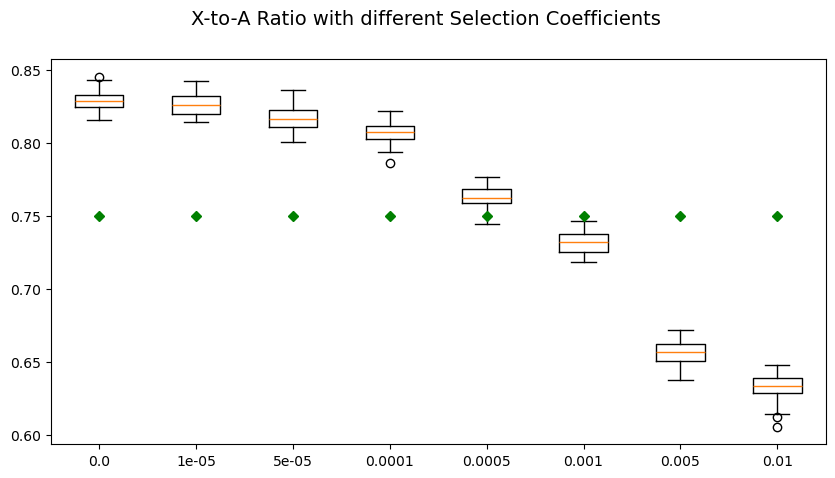

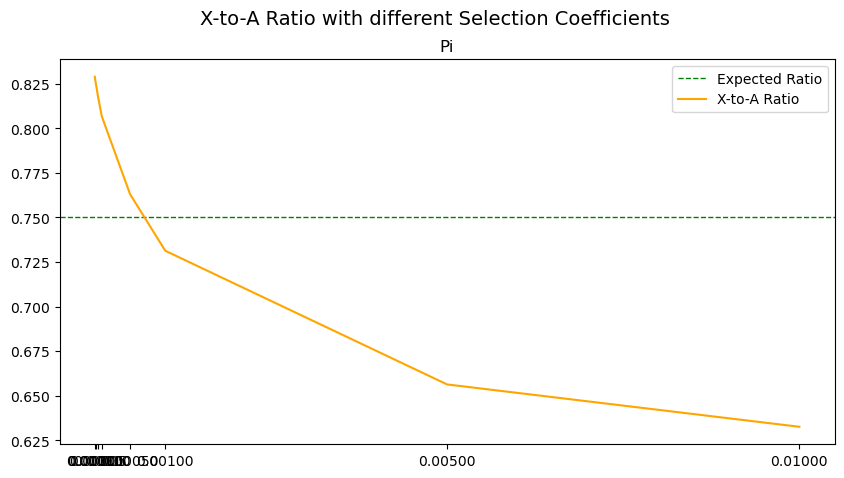

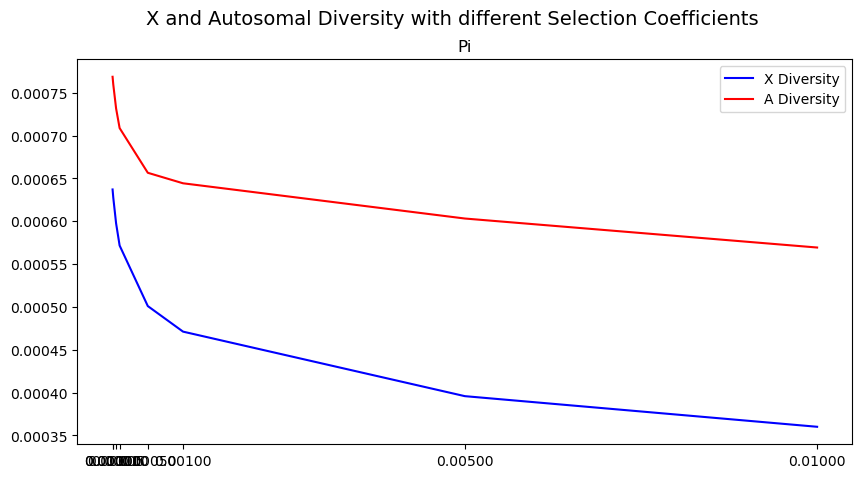

In [2]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

def format_sci(val):
    s = f"{val:.1e}"        # ex: '1.2e-04'
    base, exp = s.split("e")  # ex: base='1.2', exp='-04'
    exp = str(int(exp))       # convertit '-04' -> '-4'
    return f"{base}e{exp}"

    

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Selection/NWFLT_MutonX_Gamma/"

#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Pi_WF_NWFLT/"

Selection_coeff = [0.0,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01]
Selection_prop = [0.0,0.01,0.03,0.05,0.07,0.09,0.1]

LRatio = [0 for i in range (len(Selection_coeff))]
LX = [0 for i in range (len(Selection_coeff))]
LA = [0 for i in range (len(Selection_coeff))]
LRatio_mean = [0 for i in range (len(Selection_coeff))]
LX_mean = [0 for i in range (len(Selection_coeff))]
LA_mean = [0 for i in range (len(Selection_coeff))]

for i in range(len(Selection_coeff)):
    scoeff = Selection_coeff[i]
    sprop = 0.03
    Pi_ratio = []
    PiX = []
    PiA = []
    for NUM in range(1,501):
            if scoeff == 0.00005:
                File = f"{FOLDER}NWFLT_Mut_OnX5.0e-05,{sprop},{NUM}.txt"
            elif scoeff == 0.00001:
                File = f"{FOLDER}NWFLT_Mut_OnX1.0e-05,{sprop},{NUM}.txt"
            else:    
                File = f"{FOLDER}NWFLT_Mut_OnX{scoeff},{sprop},{NUM}.txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                if len(Values) > 0:
                    Pi_ratio.append(float(Values[1])/float(Values[0]))
                    PiX.append(float(Values[1]))
                    PiA.append(float(Values[0]))
            Text.close()

    LRatio[i] = Pi_ratio
    LX[i] = PiX
    LA[i] = PiA

    LRatio_mean[i] = np.mean(Pi_ratio)
    LX_mean[i] = np.mean(PiX)
    LA_mean[i] = np.mean(PiA)


    
fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X-to-A Ratio with different Selection Coefficients", fontsize=14)
    
ax.boxplot(LRatio,tick_labels=Selection_coeff)
#ax.set_title("X-to-A Ratio")
#ax.set_ylim([0.6, 1])
for i in range(len(Selection_coeff)):
    ax.plot(i+1,0.75, marker='D', color='green', markersize=5)
#ax.legend()
mp.show()

fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X-to-A Ratio with different Selection Coefficients", fontsize=14)

ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.plot(Selection_coeff,LRatio_mean,label="X-to-A Ratio",color = "Orange")
ax.set_title("Pi")
#ax.set_xscale('log') 
#ax.set_ylim([0.6, 1])
ax.set_xticks(Selection_coeff)
ax.legend()
mp.show()
    
fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X and Autosomal Diversity with different Selection Coefficients", fontsize=14)
    
ax.plot(Selection_coeff,LX_mean,label="X Diversity",color = "blue")
ax.plot(Selection_coeff,LA_mean,label="A Diversity",color = "red")
ax.set_title("Pi")
#ax.set_xscale('log') 
#ax.set_ylim([0.6, 1])
ax.set_xticks(Selection_coeff)
ax.legend()
mp.show()
